# Convolution
$I'(x, y) = \sum_{i=-a}^a \sum_{j=-b}^b K(i,j)I(x - i, y - j)$

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [19]:
def convolution(kernel, img):
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    #print(base)
    ans = img.copy()
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            imgCheck = imgKern * kernel
            
            ans[i-int(kN/2),j-int(kM/2)] = np.sum(imgCheck)
    return ans

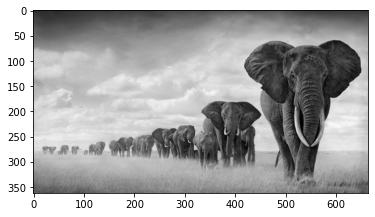

In [20]:
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [21]:
kernel = np.array([[-1, -1, -1],
                [-1, 8, -1],
                 [-1, -1, -1]])
ans = convolution(kernel, img)

In [22]:
ans

array([[ 46,  46,  47, ...,  50,  50,  50],
       [ 46, 252,   7, ..., 252, 253,  51],
       [ 46,   1,   2, ...,   0,   0,  53],
       ...,
       [ 86, 187, 196, ..., 159,  89,  89],
       [ 88,  29,  34, ...,  21,  73,  84],
       [ 88,  90,  91, ...,  84,  90,  78]], dtype=uint8)

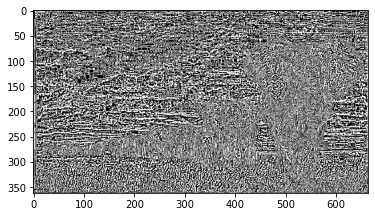

In [23]:
plt.imshow(convolution(kernel, img), cmap='gray')